In [4]:
import os,sys
import cv2
import numpy as np
import skimage.morphology # conda install scikit-image
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 150

In [9]:
fn2 = r'/playpen1/qiuyang/refined_segmentation/pascal_unrefined_mask_400/F%05d.png'
fn3 = r'//playpen1/qiuyang/refined_segmentation/unrefined_mask_50/F%05d.png'
#fn4 = r'C:\Users\qzane\c\unc3d\data\Capture-08102020\08-10-16-37-10-Capture1\Teli5_refined_merged\F%05d.png'

In [1]:
!pwd

/playpen1/qiuyang/refined_segmentation


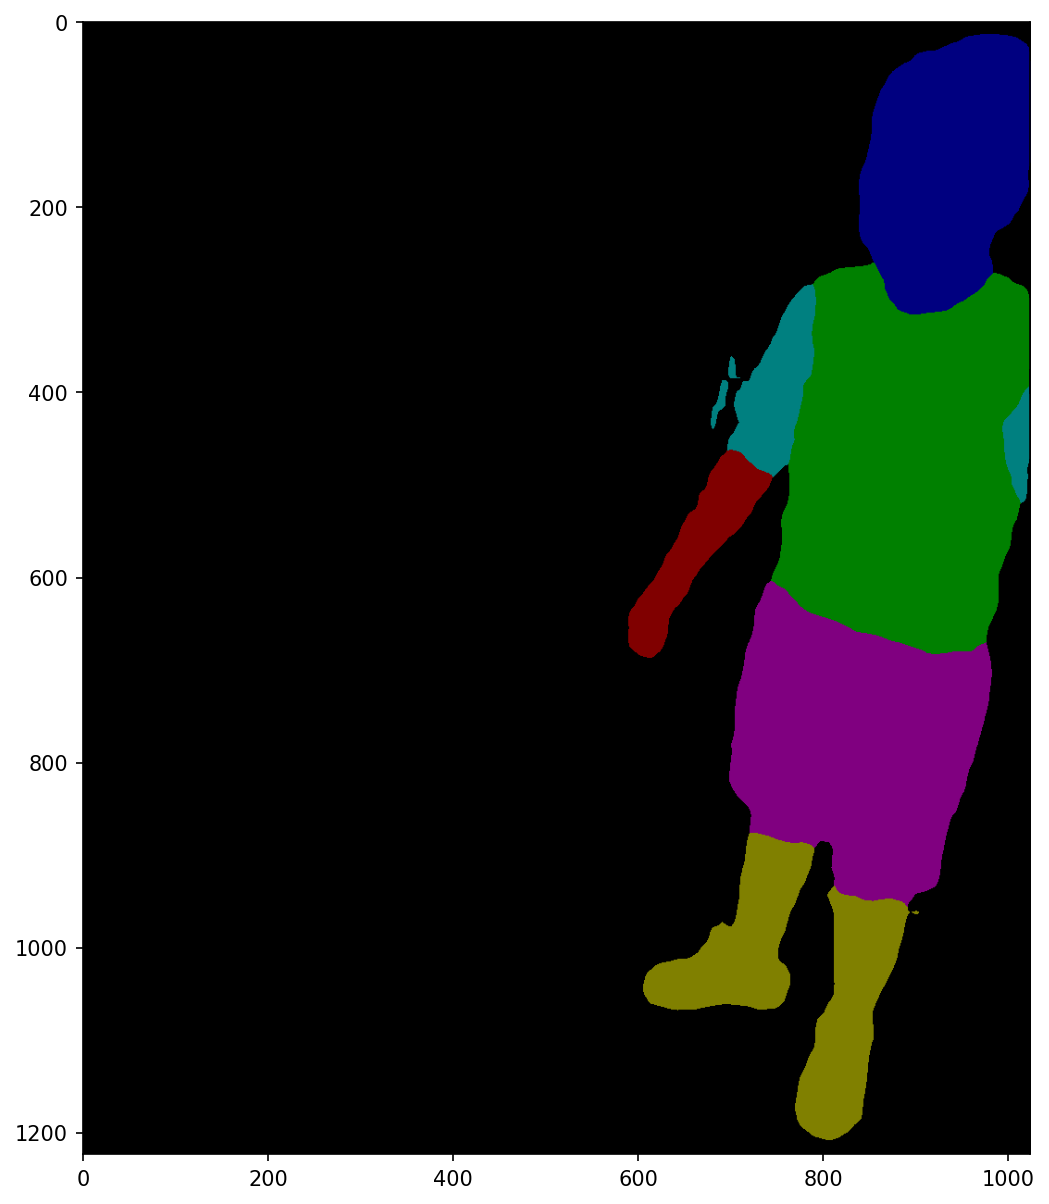

In [10]:
fid = 256
im2 = cv2.imread(fn2%fid)
plt.imshow(im2)

In [11]:
im2.shape

(1224, 1024, 3)

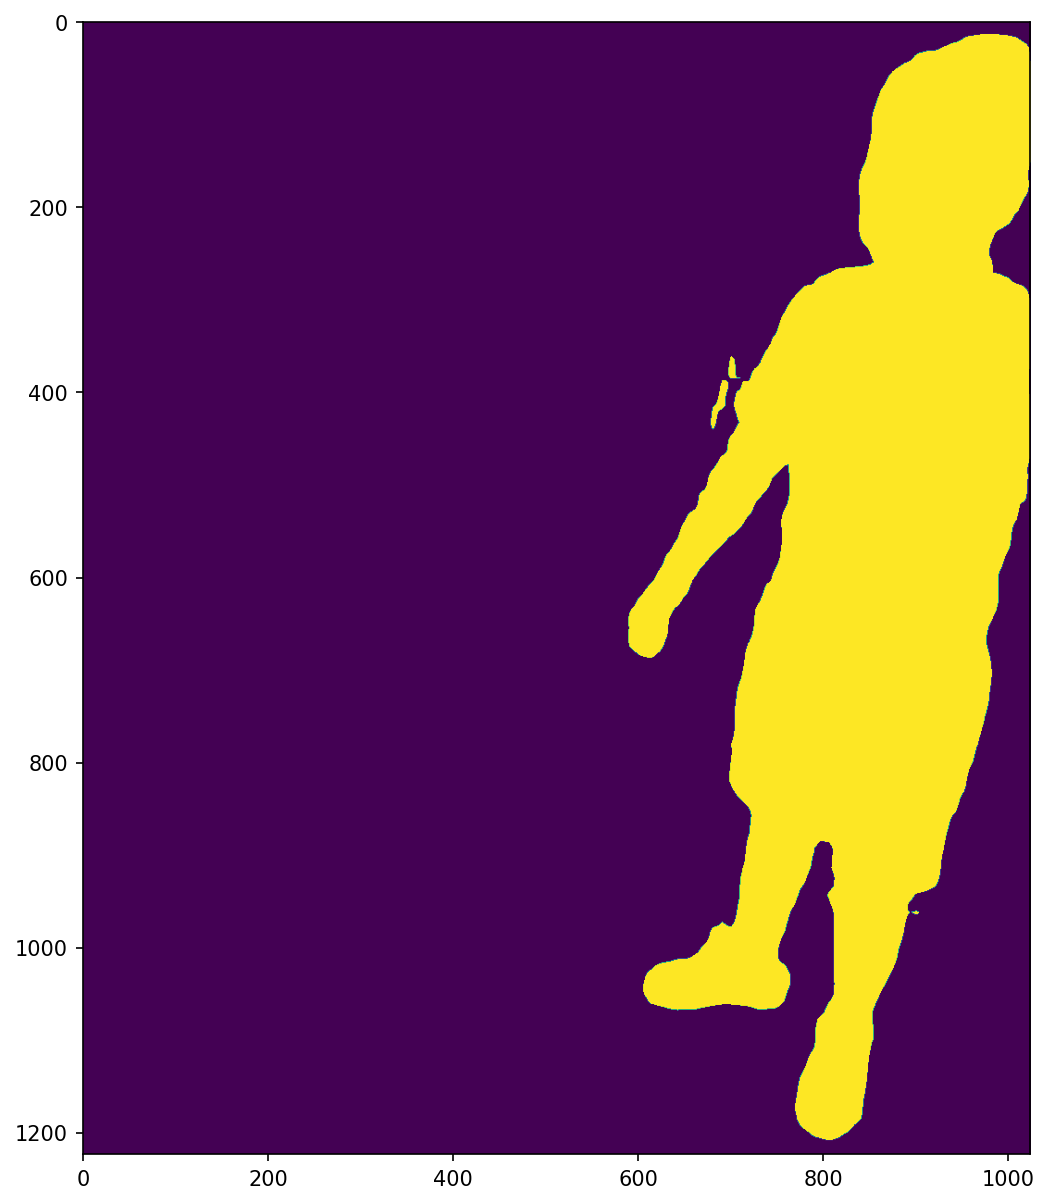

In [12]:
mask = im2.astype(np.int32).sum(-1)>0
plt.imshow(mask)

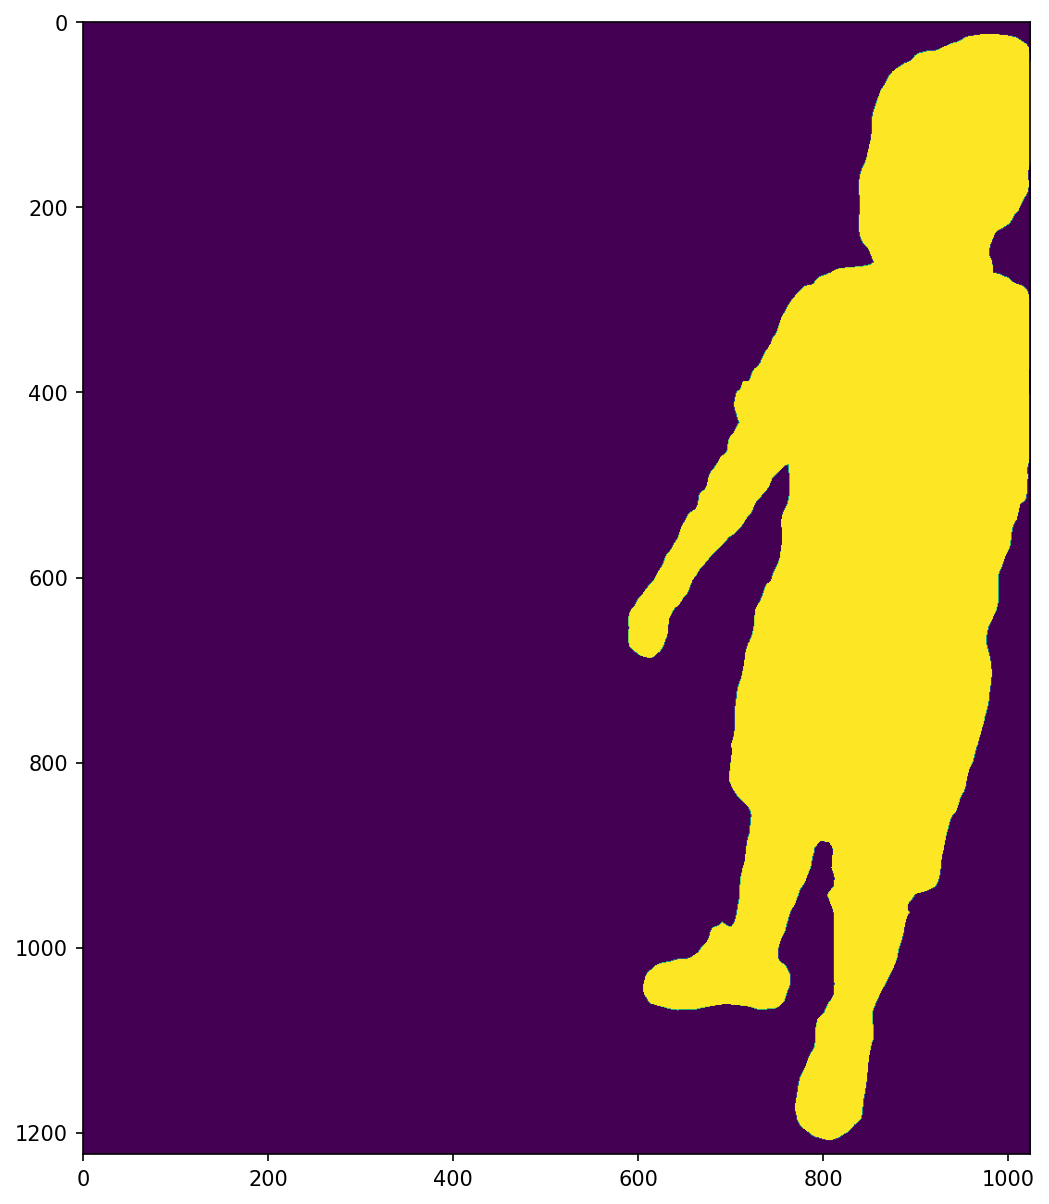

In [14]:
threshold = mask.sum() * 0.1

tmp = skimage.morphology.remove_small_objects(mask, threshold)
plt.imshow(tmp)

In [15]:
new_mask = tmp.astype(np.uint8) * 255
cv2.imwrite(fn3%fid, new_mask)

True

In [17]:
for fid in range(0, 400, 8):
    im2 = cv2.imread(fn2%fid)
    mask = im2.astype(np.int32).sum(-1)>0
    threshold = mask.sum() * 0.1
    tmp = skimage.morphology.remove_small_objects(mask, threshold)
    new_mask = tmp.astype(np.uint8) * 255
    cv2.imwrite(fn3%fid, new_mask)